In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [22]:
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from seaborn import heatmap
from matplotlib import pyplot as plt
import xgboost as xgb

In [2]:
test_df = pd.read_csv('finaldata.csv')

In [4]:

y=test_df.match
X= test_df[['samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'pattr2_1', 'psinc2_1', 'pintel2_1', 'pfun2_1', 'pamb2_1', 'pshar2_1', 'pattr3_1', 'psinc3_1', 'pfun3_1', 'pintel3_1', 'pamb3_1', 'pimprace', 'pimprelig', 'pexphappy', 'pexpnum', 'age_difference', 'female_bal', 'male_bal','female_conformity', 'male_conformity']]

In [5]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [7]:
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

### KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
f1_score(y_test, y_pred)

0.3578274760383387

### Logistic Regression

In [46]:
logreg = LogisticRegression(class_weight='balanced', C=10, n_jobs=-1)

In [47]:


logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

print("Training F1 Score:", f1_score(y_train, y_pred_train))
print("Testing F1 Score:", f1_score(y_test, y_pred_test))


Training F1 Score: 0.6344322344322344
Testing F1 Score: 0.3099173553719008


In [55]:
sorted(list(zip(list(X.columns),list(logreg.coef_[0]))), key = lambda x: abs(x[1]), reverse=True)[:15]

[('attr1_1', 1.194669802452629),
 ('pattr2_1', 0.9083284777008627),
 ('intel1_1', 0.8282679327000706),
 ('fun1_1', 0.7764017543324211),
 ('sinc1_1', 0.7607069614050621),
 ('amb1_1', 0.7342534899486872),
 ('pf_o_att', -0.6265320869301618),
 ('shar1_1', 0.5086903043229383),
 ('pamb2_1', 0.5008893621936337),
 ('pf_o_sha', -0.4297108042078764),
 ('pf_o_sin', -0.42251709904002294),
 ('psinc2_1', 0.4026049178451724),
 ('pintel2_1', 0.3892959835027837),
 ('pfun2_1', 0.32364561146365073),
 ('pshar2_1', 0.32219139613769493)]

### Decision Tree Classifier

In [73]:
dtc = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=17)

dtc.fit(X_train,y_train)


y_pred_train = dtc.predict(X_train)

y_pred_test = dtc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:", f1_score(y_train, y_pred_train))
print("Testing F1 Score:", f1_score(y_test, y_pred_test))

Training F1 Score: 0.9880843263061411
Testing F1 Score: 0.31210191082802546


In [74]:
sorted(list(zip(list(X.columns),list(dtc.feature_importances_))), key = lambda x: x[1], reverse= True)

[('pfun3_1', 0.22193473766518565),
 ('pattr3_1', 0.04952899098752898),
 ('age_difference', 0.03343327482461799),
 ('attr1_1', 0.030650870497301537),
 ('intel3_1', 0.029675790402536796),
 ('fun1_1', 0.027797259710777143),
 ('pimprace', 0.027099882501716566),
 ('male_conformity', 0.023008788182965714),
 ('fun3_1', 0.022714624869436578),
 ('amb1_1', 0.022394445126173446),
 ('female_conformity', 0.02133623246288941),
 ('go_out', 0.021150584074747743),
 ('shar1_1', 0.021060772763736597),
 ('date', 0.020849185911119544),
 ('exphappy', 0.02021741056480271),
 ('pintel3_1', 0.019145515558465494),
 ('intel1_1', 0.016742101773046834),
 ('shar2_1', 0.016566901514975734),
 ('expnum', 0.01641166611738153),
 ('pf_o_att', 0.016193048693702392),
 ('attr3_1', 0.01572102676898508),
 ('pintel2_1', 0.015500643710632108),
 ('amb2_1', 0.01528201524393223),
 ('pf_o_sha', 0.015083437345541056),
 ('pamb3_1', 0.014328343798038911),
 ('goal', 0.013834599809093637),
 ('pattr2_1', 0.013492724092450989),
 ('sinc3_1'

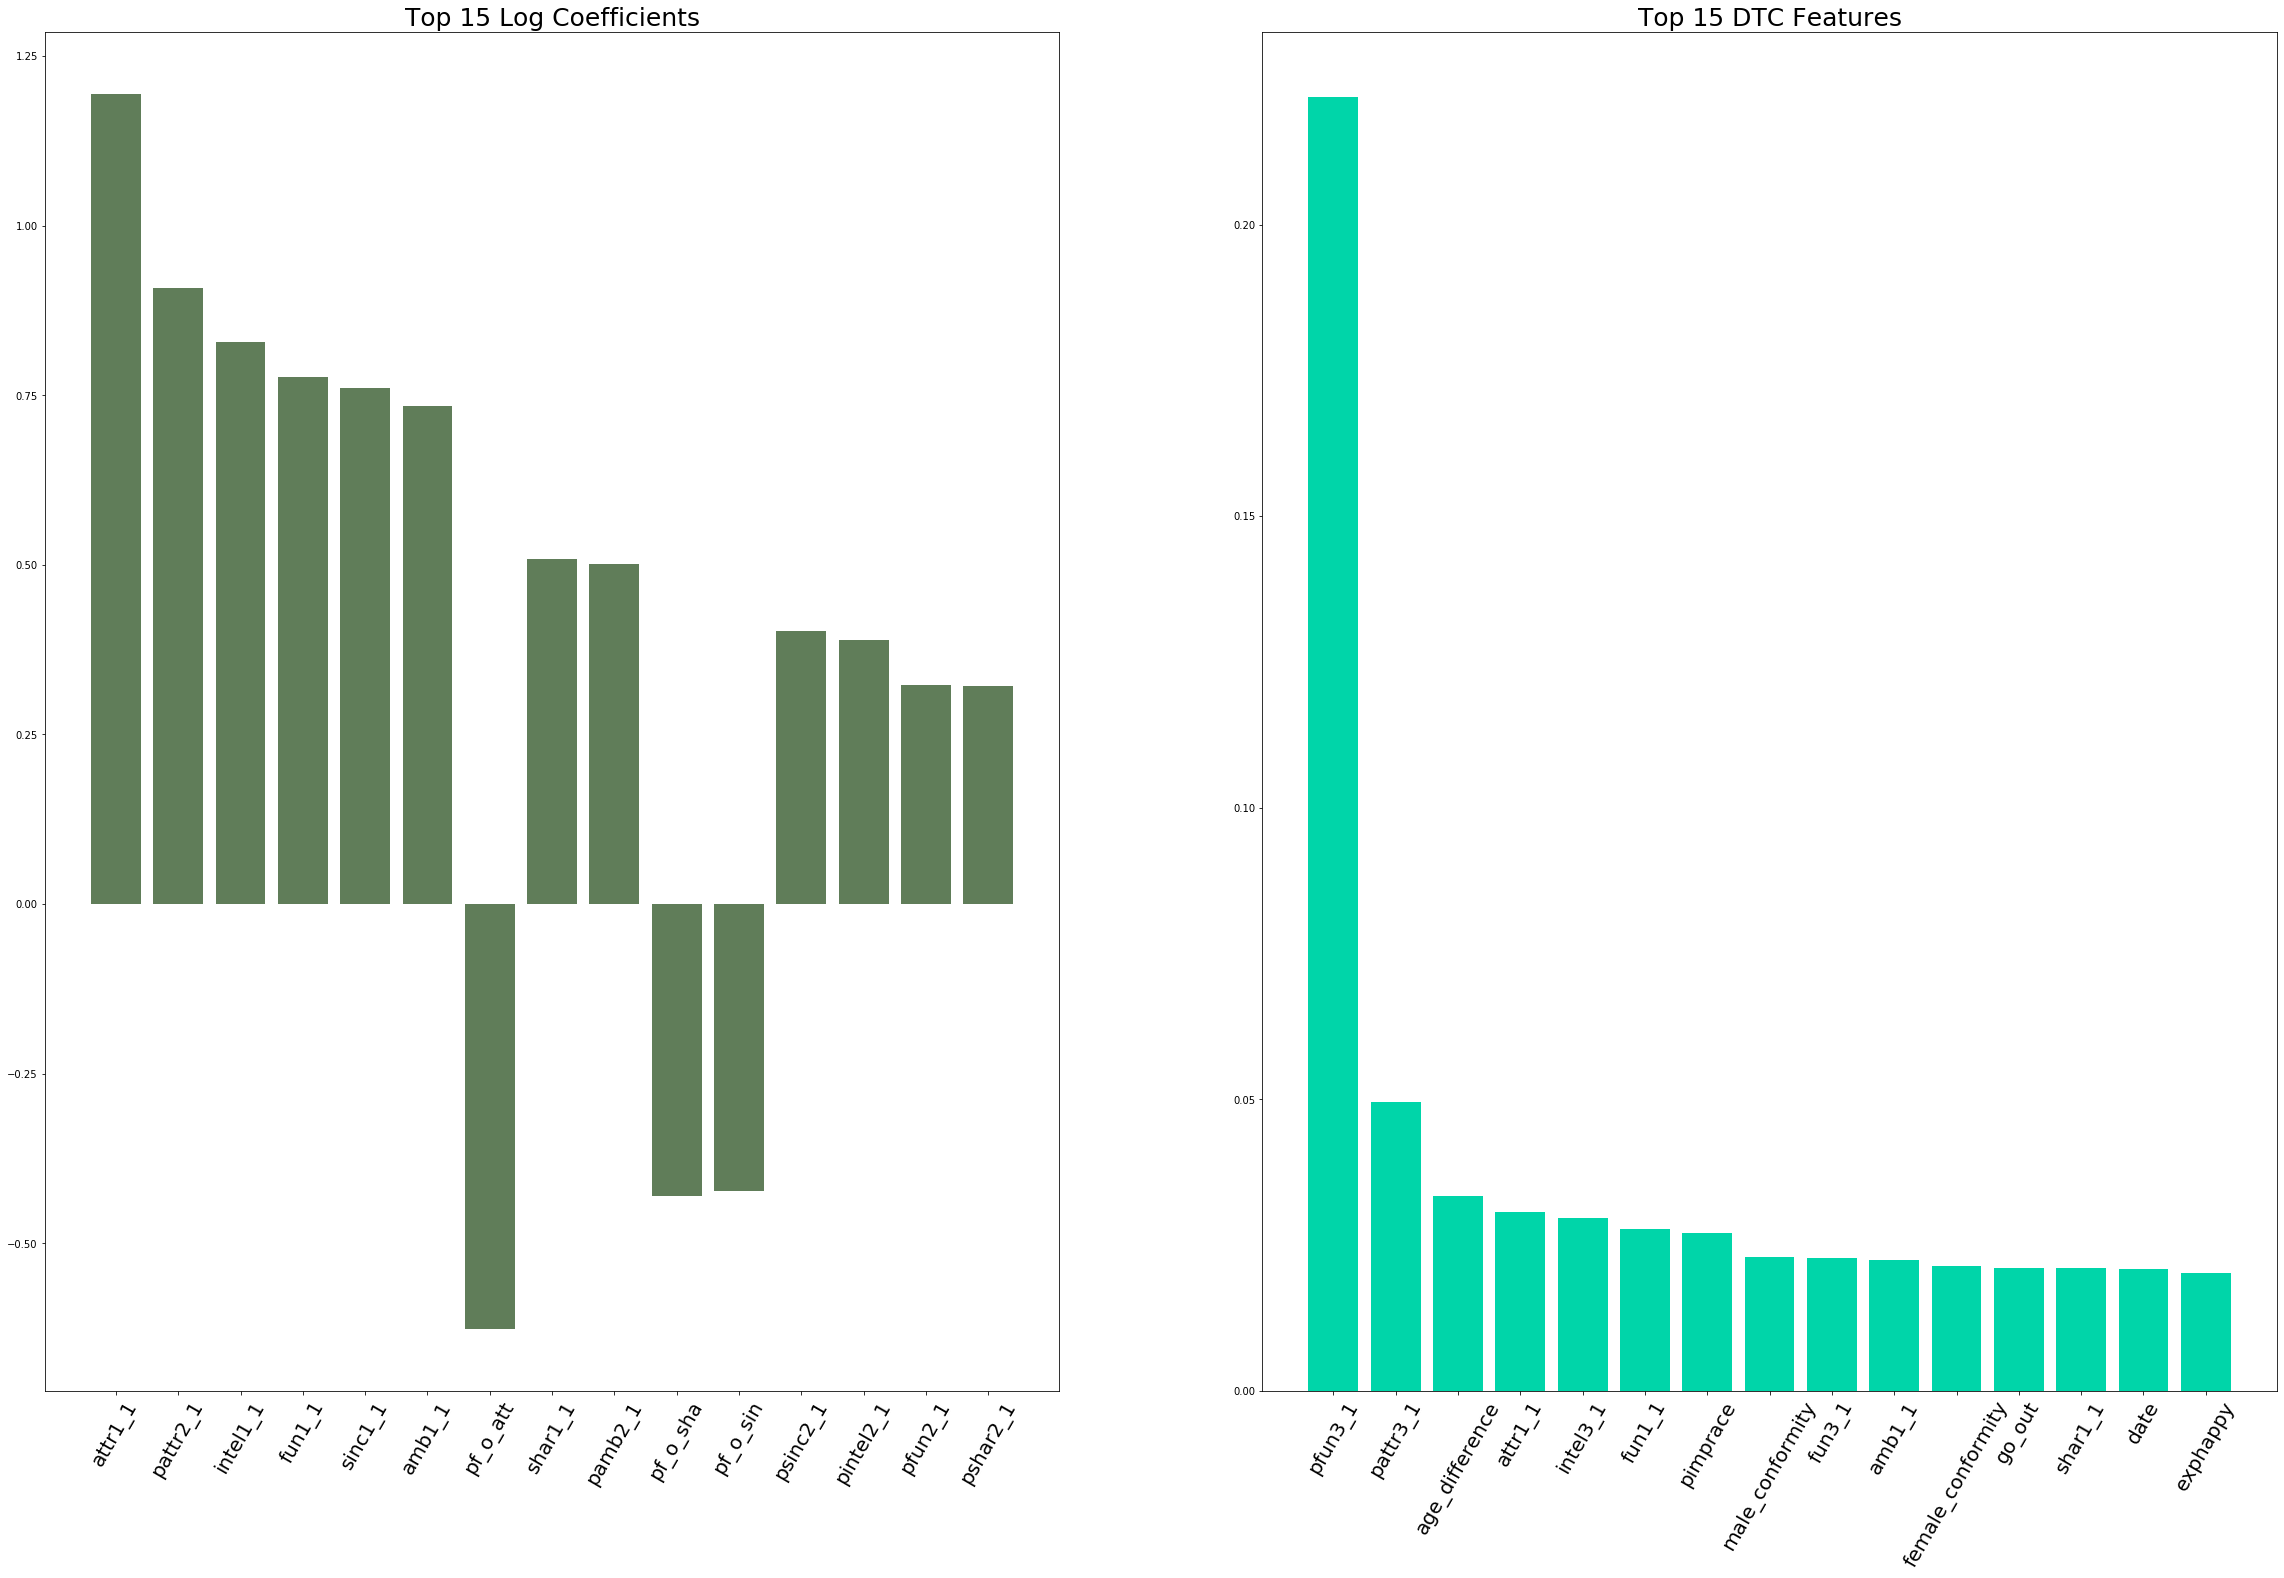

In [79]:
#graph code
log_coef=sorted(list(zip(list(X.columns),list(logreg.coef_[0]))), key = lambda x: abs(x[1]), reverse=True)[:15]
log_heights=[x[1] for x in log_coef]
log_labels=[x[0] for x in log_coef]

dtc_coef=sorted(list(zip(list(X.columns),list(dtc.feature_importances_))), key = lambda x: x[1], reverse= True)[:15]
dtc_heights=[x[1] for x in dtc_coef]
dtc_labels=[x[0] for x in dtc_coef]
fig, ax =plt.subplots(1,2, figsize=(40,25))
ax[0].bar(x=range(len(log_heights)), height=log_heights, color=['#607D59'] )
ax[0].set_xticks(range(len(log_heights)))
ax[0].set_xticklabels(labels=log_labels, fontsize=20, rotation=60)
ax[0].set_title('Top 15 Log Coefficients', fontsize=25)
ax[1].bar(x=range(len(dtc_heights)), height=dtc_heights, color=['#00D5A9'] )
ax[1].set_xticks(range(len(dtc_heights)))
ax[1].set_xticklabels(labels=dtc_labels, fontsize=20, rotation=60)
ax[1].set_title('Top 15 DTC Features', fontsize=25)
fig.savefig('model_coefficients.png')

### Random Forest

In [9]:
rfc=RandomForestClassifier(class_weight='balanced', criterion='entropy', n_estimators=900, max_features=5, max_depth=7, min_samples_split=100)

In [10]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=5, min_samples_split=100,
                       n_estimators=900)

In [81]:
y_pred = rfc.predict(X_test)
f1_score(y_test, y_pred)

0.39999999999999997

### Voting Classifier

In [82]:
voting_clf = VotingClassifier(
                estimators=[('logreg', logreg), ('knneighbors', knn), ('decisiontree', dtc)], 
                voting='soft')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = f1_score(y_test, vc_preds)

print(vc_f1)

0.3601108033240997
